In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set API key and location
api_key = 'fb365aa6104829b44455572365ff3b4e'
lat, lon = 18.184135, 74.610764
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [2]:
# Fetch weather data
response = requests.get(api_url)
weather_data = response.json()


In [3]:
# Extract relevant data
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] - 273.15 for item in weather_data['list']]  # Convert to Celsius
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]


In [4]:
weather_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature': temperature,
    'Humidity': humidity,
    'Wind Speed': wind_speed,
    'Description': weather_description
}).set_index('Timestamp')

In [5]:
# Print max and min temperatures
print(f"Maximum Temperature: {weather_df['Temperature'].max():.2f} °C")
print(f"Minimum Temperature: {weather_df['Temperature'].min():.2f} °C")

# Daily mean calculations
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['Humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['Wind Speed'].resample('D').mean()


Maximum Temperature: 31.41 °C
Minimum Temperature: 19.55 °C


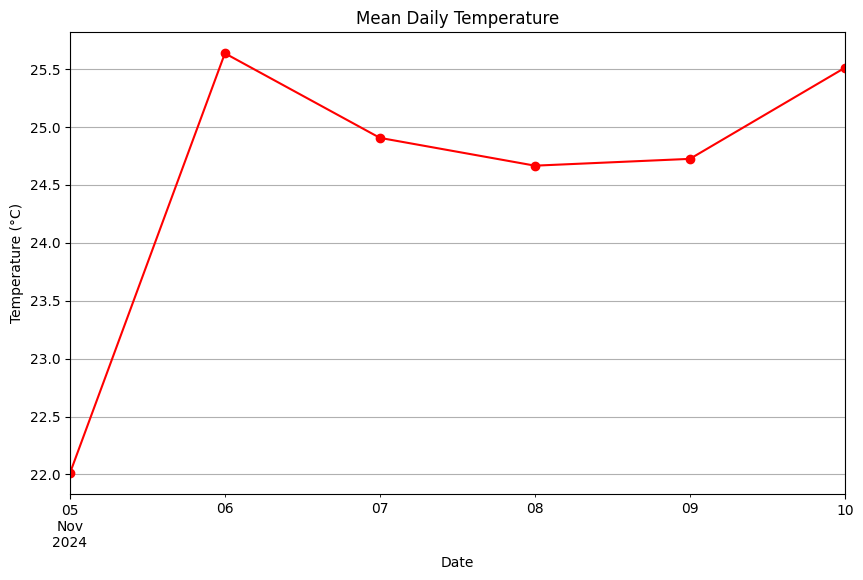

In [6]:
# Plot daily mean temperature
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(marker='o', color='red')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

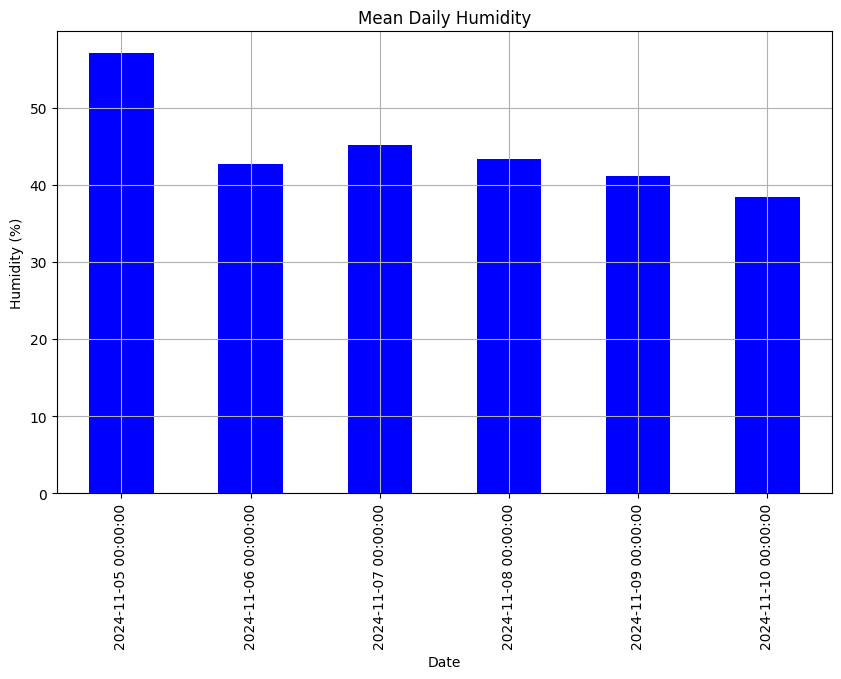

In [7]:
# Plot daily mean humidity
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

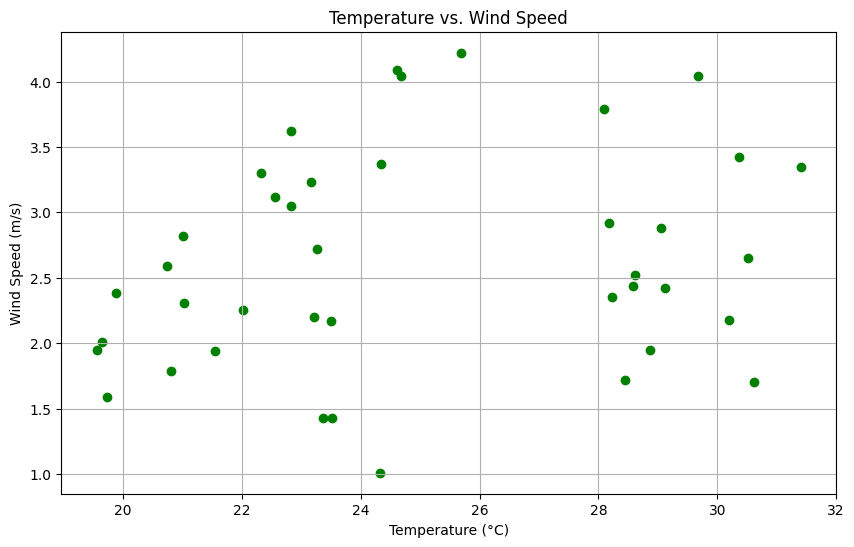

In [8]:
# Scatter plot: Temperature vs Wind Speed
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['Wind Speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

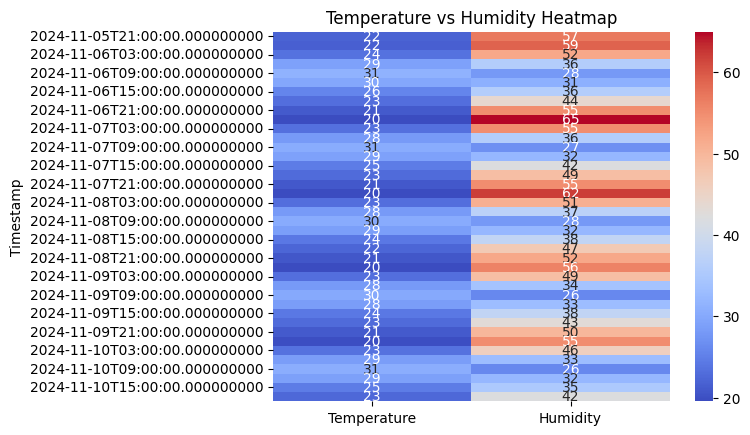

In [9]:
# Heatmap: Temperature vs Humidity
sns.heatmap(weather_df[['Temperature', 'Humidity']], annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

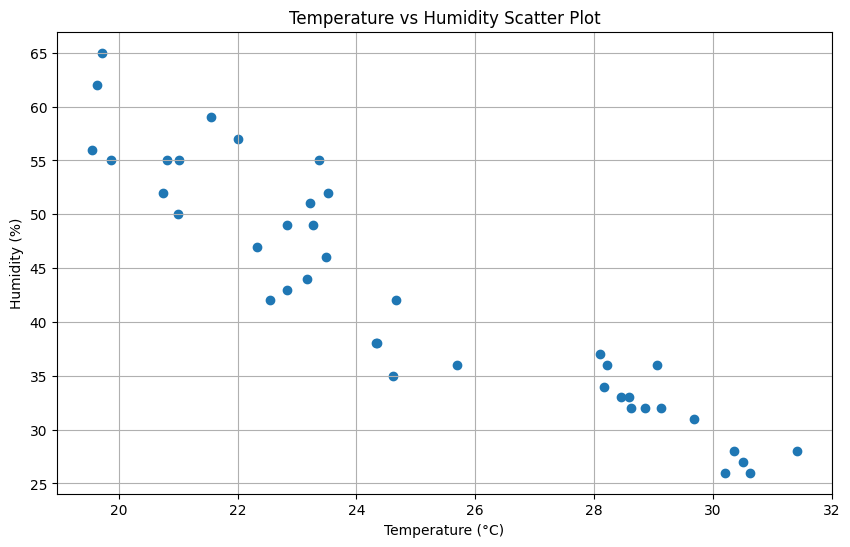

In [10]:
# Scatter plot: Temperature vs Humidity
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['Humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.grid(True)
plt.show()